# Lecture 12: Classification

Today's demo contains
* A kNN example
* A Logistic regression example

In [2]:
# Load packages as usual
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import matplotlib.cm as cm
import numpy.matlib


# Manipulating figure sizes
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,7)
matplotlib.rc('font', size=15)
matplotlib.rc('axes', titlesize=15)

### Part 1: k-Nearest Neighbor classification

We consider the medical application of diagnosing Parkinson's disease from a person's voice.  We consider the data from Little et al, which can be obtained from the well-known UCI benchmark repository (see Frank and Asuncion).

The data were collected from 31 people, 23 suffering from Parkinson's disease.  Several voice recordings of these people were processed. Each line in the data files corresponds to one recording.  The first 22 columns are features derived from the recording, including minimum, average and maximum vocal fundamental frequency, several measures of variation in fundamental frequency, several measures of variation in amplitude, two measures of ratio of noise to tonal components in the voice status, two nonlinear dynamical complexity measures, a measure called signal fractal scaling exponent, as well as nonlinear measures of fundamental frequency variation (Little et al, Frank and Asuncion).  The last column is the target label indicating whether the subject is healthy (0) or suffers from Parkinson's disease (1).

**References:**
M.A.~Little, P.E.~McSharry, E.J.~Hunter, J.~Spielman and L.O.~Ramig, \emph{Suitability of dysphonia measurements for telemonitoring of {P}arkinson's disease}, IEEE Transactions on Biomedical Engineering, Vol.~56, No.~4, pp.~1015--1022, 2009.
A. Frank and A. Asuncion, \emph{{UCI} Machine Learning Repository}, \url{http://archive.ics.uci.edu/ml}, University of California, Irvine, School of Information and Computer Sciences, 2010.


In [3]:
# Loading, processing and checking the data
train = np.loadtxt('parkinsonsTrain.dt')
test = np.loadtxt('parkinsonsTest.dt')
trainlabels = train[:,-1]
testlabels = test[:,-1]
traindata = train[:,0:-1]
testdata = test[:,0:-1]
trainnum, dim = traindata.shape
testnum, dim = testdata.shape
print('N_train:', trainnum)
print('N_test:', testnum)
print('dim:', dim)

N_train: 98
N_test: 97
dim: 22


Visualize the dataset using PCA:

In [4]:
def pca(data):
    # Extract data dimensions
    d, N = data.shape

    # First, center the data
    center = np.mean(data, 1)
    centers = np.matlib.repmat(center, N, 1)
    data_cent = data - np.transpose(centers)
    
    # Compute covariance and its eigenvalues from centered data
    Sigma = np.cov(data_cent)
    evals, evecs = np.linalg.eigh(Sigma)
    
    # Return eigenvalues and eigenvectors and -- for the sake of the lecture -- also the centered data
    return np.flip(evals,0), np.flip(evecs, 1), data_cent

PCevals, PCevecs, data_cent = pca(traindata.T)

# Next, project onto two first eigenvectors for visualization
PC1 = PCevecs[:,0]
PC2 = PCevecs[:,1]

label1 = np.argwhere(trainlabels==1)
label0 = np.argwhere(trainlabels==0)
PC1projs = np.matmul(data_cent.T,PC1)
PC2projs = np.matmul(data_cent.T,PC2)

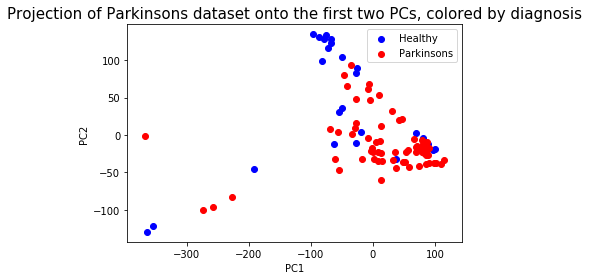

In [5]:
plt.scatter(PC1projs[label0], PC2projs[label0], color='blue', label='Healthy')
plt.scatter(PC1projs[label1], PC2projs[label1], color='red', label='Parkinsons')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Parkinsons dataset onto the first two PCs, colored by diagnosis')
plt.legend()

Next, we make a simple implementation of kNN:

In [6]:
def knn(train, test, trainlabels, testlabels, k):
    # Fill in
    
    return dmat, pred_classes, acc


# Euclidean distance matrix:
def dist_m(set1, set2):
    set1num, dim = set1.shape
    set2num, dim = set2.shape
    D = np.zeros((set1num, set2num))
    for i in range(set1num):
        for j in range(set2num):
            D[i,j] = np.linalg.norm(set1[i,:]-set2[j,:])

    return D

Run kNN, testing on both the training data and the test data, for k=1:

In [7]:
# Testing on training data:
_, _, acc = knn(traindata, traindata, trainlabels, trainlabels, 1)
print('Train Accuracy:', acc)

# Testing on test data:
_, _, acc = knn(traindata, testdata, trainlabels, testlabels, 1)
print('Test Accuracy:', acc)

NameError: name 'dmat' is not defined

Repeat the experiment for varying k:

In [8]:
ks = range(1,16)
acc_train = np.zeros(15)
acc_test = np.zeros(15)
for k in ks:
    _,_,acc_train[k-1] = knn(traindata, traindata, trainlabels, trainlabels, k)
    _,_,acc_test[k-1] = knn(traindata, testdata, trainlabels, testlabels, k)
    
plt.plot(acc_train, label='Training accuracy')
plt.plot(acc_test, label='Testing accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

NameError: name 'dmat' is not defined

### Part 2: Logistic regression for classification

We start out by loading and viewing the dataset (from http://www.ats.ucla.edu/stat/r/dae/logit.htm)

In [23]:
# Loading and structuring
data = np.loadtxt('admission_dataset.txt')
print(data.shape)
data_matrix = data[:,[0,1]]
print(data_matrix.shape)
admission_labels = data[:,2]
print(admission_labels.shape)

N, num_feat = data_matrix.shape
colors = ['red', 'blue']
admittance = ['admitted', 'not admitted']

(400, 3)
(400, 2)
(400,)


Note that before starting, we need to turn the admission labels (the classes) into +/- 1 labels

In [10]:
y = ((admission_labels-0.5)*2).reshape(N,1)

Text(0.5,1,'College admittance as a function of GPA and GRE score')

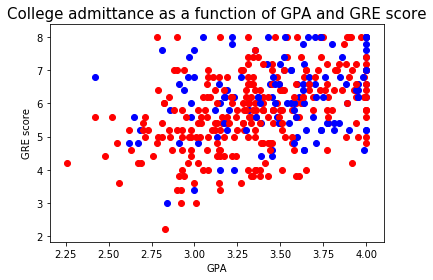

In [11]:
# Viewing as a scatter plot
for i in range(N):
    plt.scatter(data_matrix[i,0], data_matrix[i,1], color=colors[int(admission_labels[i])])
    plt.xlabel('GPA')
    plt.ylabel('GRE score')
    
plt.title('College admittance as a function of GPA and GRE score')

Our first building block is the logistic function; let's define and plot it:

Text(0.5,1,'Plot of logistic function')

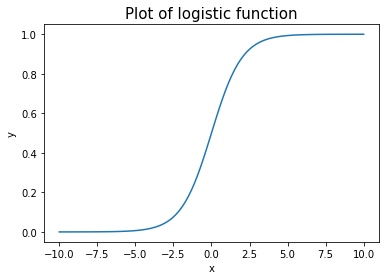

In [12]:
def logistic(x):
    return np.exp(x)/(1 + np.exp(x))

# Plotting
xs = np.linspace(-10,10,num=100)
plt.plot(xs, logistic(xs))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of logistic function')

Next, let's implement the logistic regression loss function (for the training set (X, y)):

In [13]:
def logistic_insample(X, y, w):
    N, num_feat = X.shape
    w = w.reshape(num_feat,1)
    E = 0
    for n in range(N):
        xn = X[n,:].reshape(num_feat,1)
        E += (1/N)*np.log(1/logistic(y[n]*np.matmul(w.T,xn)))
    return E[0,0]

Similarly, we implement its gradient:

In [14]:
def logistic_gradient(X, y, w):
    N, num_feat = X.shape
    w = w.reshape(num_feat,1)    
    g = np.zeros(w.shape)
    
    for n in range(N):
        xn = X[n,:].reshape(num_feat,1)
        increment = ((-1/N)*y[n]*xn)*logistic(-y[n]*np.matmul(w.T,xn))
        g += increment
    return g

Having working functions for logistic log likelihood and logistic gradient, let's implement gradient descent

In [24]:
def log_reg(Xorig, y, max_iter, grad_thr):       
    # X is an N by d data matrix of input values
    # y is a N by 1 matrix of target values -1 and 1
    num_pts, num_feat = Xorig.shape
    onevec = np.ones((num_pts,1))
    X = np.concatenate((onevec, Xorig), axis = 1)    
    dplus1 = num_feat + 1
        
    # Initialize learning rate for gradient descent
    learningrate = 0.1        
    
    # Initialize weights at time step 0    
    w = 0.1*np.random.randn(num_feat + 1).reshape(num_feat+1,1)
    
    # Compute value of logistic log likelihood
    value = logistic_insample(X,y,w)
    
    num_iter = 0  
    convergence = 0
    
    # Keep track of function values
    E_in = []
    
    while convergence == 0:
        num_iter = num_iter + 1                        

        # Compute gradient at current w      
        g = logistic_gradient(X,y,w)
       
        # Set direction to move       
        v = -g
                     
        # Update weights
        w_new = w + learningrate*v
       
        # Check for improvement: Compute in-sample error for new w
        cur_value = logistic_insample(X,y,w_new)
        if cur_value < value:
            w = w_new
            value = cur_value
            E_in.append(value)
            # Adaptive learning rate: Increase learning rate when things go well
            learningrate *=1.1
        else:
            # Adaptive learning rate: Decrease learning rate if no improvement
            learningrate *= 0.9   
            
        # Determine whether we have converged: Is gradient norm below
        # threshold, and have we reached max_iter?
               
        g_norm = np.linalg.norm(g)
        if g_norm < grad_thr:
            convergence = 1
            print('converged')
        elif num_iter > max_iter:
            convergence = 1
            print('reached maximum nr of iterations')
           
    return w, E_in 

Let's run logistic regression on our dataset!

In [22]:
print(y.shape)
print(data_matrix.shape)
wopt, E = log_reg(data_matrix, y, 100000, 0.01)

(400, 1)
(400, 2)
converged


Having optimized the model, let's predict classes on the training set by computing class probabilities and thresholding them at 0.5:

In [27]:
def log_pred(Xorig, w):
    # X is a d by N data matrix of input values    
    num_pts, num_feat = Xorig.shape
    w = w.reshape(num_feat+1,1)    
    onevec = np.ones((num_pts,1))
    X = np.concatenate((onevec, Xorig), axis = 1)
    P = np.zeros(num_pts)
    for n in range(num_pts):
        xn = X[n,:].reshape(num_feat+1,1)   
        P[n] = logistic(np.matmul(w.T,xn)) # Probability of having label +1
        
    Pthresh = np.round(P) #0/1 class labels
    pred_classes = Pthresh*2-1
    return P, pred_classes

P, pred_classes = log_pred(data_matrix, wopt)

Let's evaluate the classification accuracy on the training set

In [26]:
test = np.abs(pred_classes.reshape(N,1) - y)
errors = np.sum(np.abs(pred_classes.reshape(N,1) - y))/2
acc = (N-errors)/N
print('Accuracy:', acc)

Accuracy: 0.6875


My classification accuracy is not great -- is this just not working? Look back at the input dataset!

Text(0.5,1,'Predicted College admittance probability as a function of GPA and GRE score')

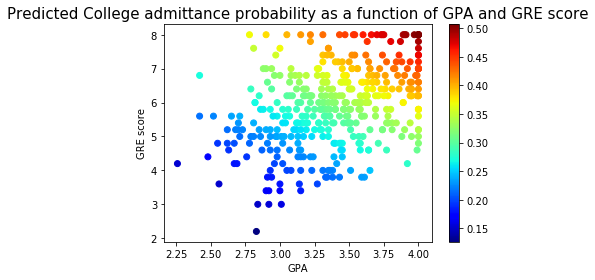

In [19]:
# Viewing training set as a scatter plot
plt.scatter(data_matrix[:,0], data_matrix[:,1], c=P, cmap=cm.jet)
plt.xlabel('GPA')
plt.ylabel('GRE score')
plt.colorbar()
    
plt.title('Predicted College admittance probability as a function of GPA and GRE score')